In [20]:
import sys
from pathlib import Path

# Add the parent directory to sys.path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

In [21]:
from models import *
from denoisers.dip import losses, DIP
import utils

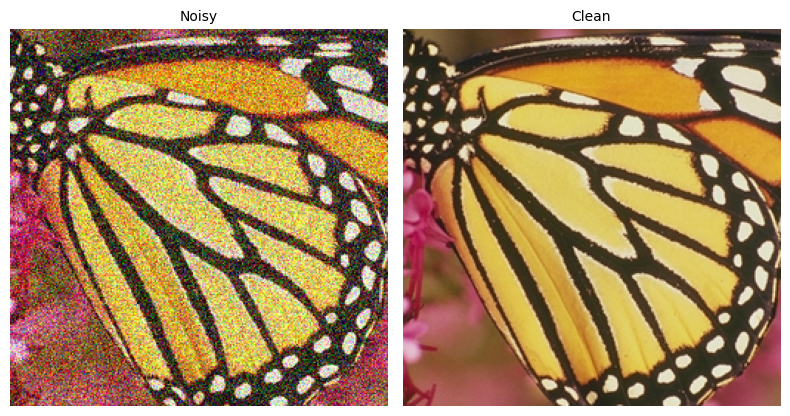

In [22]:
x = utils.load_image('../data/image/Set5/butterfly.png')
y = utils.get_noisy_image(x, psnr=15)

utils.plot_row([y, x], ["Noisy", "Clean"])

In [23]:
net = UNetECA(hidden_ch=8, n_layers=4)
mse = losses.MSE()
dip = DIP(net=net, loss=mse, early_stopping=True, max_epochs=2000)

Running: 0 - DIP - ES - MSE - UNet ECA 


 35%|███▍      | 698/2000 [00:22<00:41, 31.24it/s]


Summary: {'runtime': '00:00:22', 'stopping_point': 398}



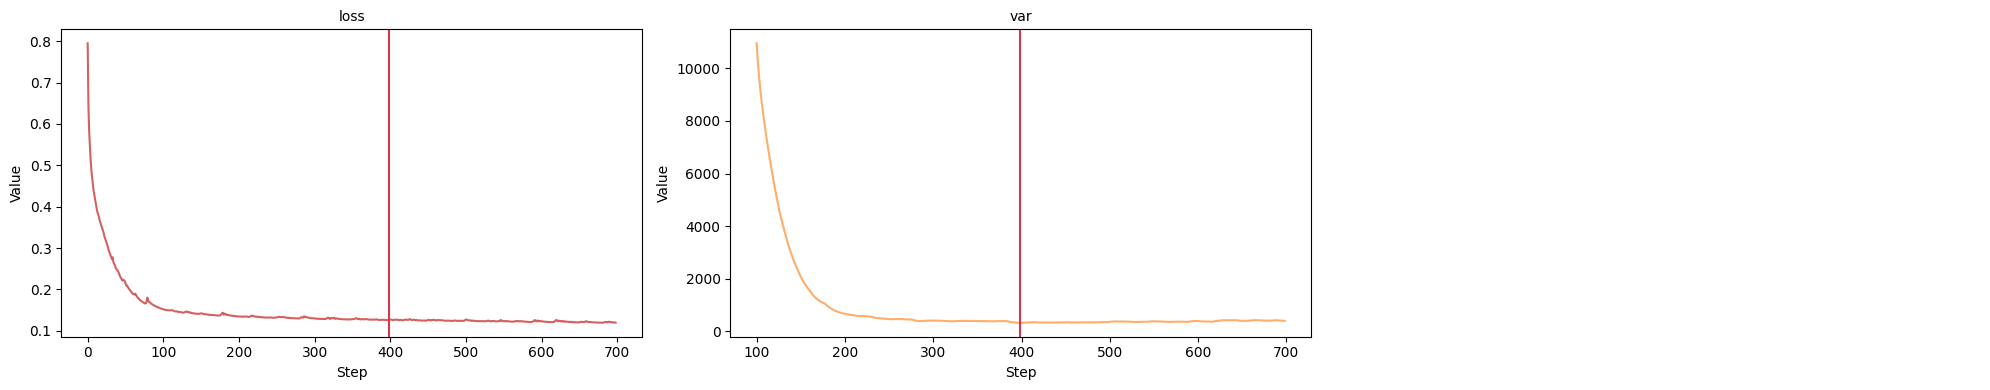

In [24]:
options = {
    "mode": "local",
    "config": {
        "out_dir": "output/videos",
        "denoiser_id": 0,
        "data_id": 0,
    },
    "metrics": {},
    "log_output": False,
}

x_hat, _, _ = dip.denoise(y, x, options)
x_hat = x_hat.detach().clone().cpu()

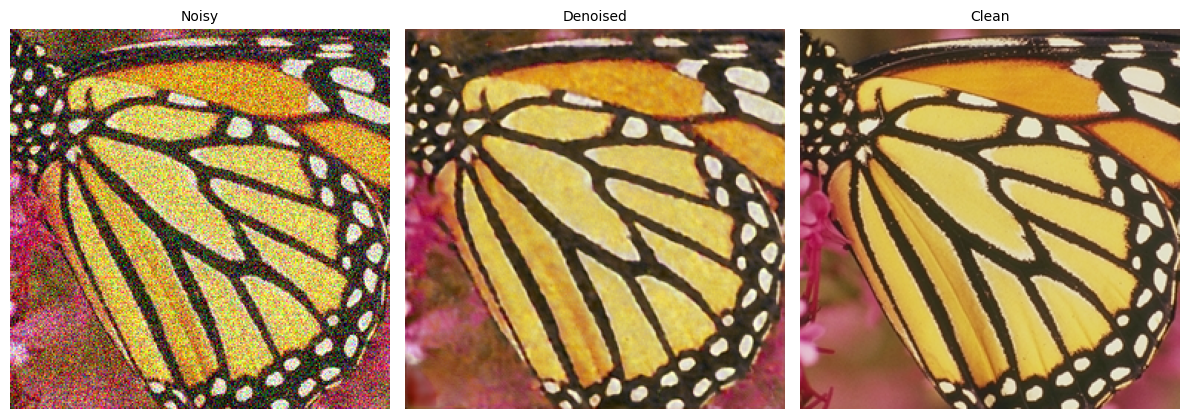

In [25]:
utils.plot_row([y, x_hat, x], ["Noisy", "Denoised", "Clean"])